In [22]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
main_df = pd.read_csv('/Users/miti/Documents/EXETER/Learning from Data/Coursework/finalDataStudy3.csv', sep=",", encoding="ISO-8859-1", header=0)
main_df = main_df.iloc[: , 1:]

In [24]:
main_df = main_df.dropna()

In [25]:
main_df

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,333.879006,0.0,2568.300049,2568.300049,2568.300049,2568.300049,0.0,0.0
1,330.213013,0.0,2540.100098,2540.100098,2540.100098,2540.100098,0.0,0.0
2,331.811987,0.0,2552.399902,2552.399902,2552.399902,2552.399902,0.0,1.0
3,335.906987,0.0,2583.899902,2583.899902,2583.899902,2583.899902,0.0,1.0
4,338.923013,0.0,2607.100098,2607.100098,2607.100098,2607.100098,0.0,1.0
...,...,...,...,...,...,...,...,...
104219,4625.367578,0.0,66812.453130,66022.976560,66054.921880,66076.679690,0.0,1.0
104220,4627.575859,0.0,66446.367190,66030.351560,66076.679690,66108.226560,0.0,1.0
104221,4685.817500,0.0,66940.250000,66102.546880,66108.226560,66940.250000,0.0,1.0
104222,4728.840157,0.0,67726.562500,66794.609380,66940.250000,67554.859380,0.0,1.0


In [34]:
df_kmeans = pd.get_dummies(main_df, drop_first=True)
df_kmeans.head()

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,333.879006,0.0,2568.300049,2568.300049,2568.300049,2568.300049,0.0,0.0
1,330.213013,0.0,2540.100098,2540.100098,2540.100098,2540.100098,0.0,0.0
2,331.811987,0.0,2552.399902,2552.399902,2552.399902,2552.399902,0.0,1.0
3,335.906987,0.0,2583.899902,2583.899902,2583.899902,2583.899902,0.0,1.0
4,338.923013,0.0,2607.100098,2607.100098,2607.100098,2607.100098,0.0,1.0


Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

Creating the K-means clustering model!

In [36]:
df_kmeans

,CloseUSD,Volume,High,Low,Open,Close,isRecession,isUpOrDown
0,333.879006,0.0,2568.300049,2568.300049,2568.300049,2568.300049,0.0,0.0
1,330.213013,0.0,2540.100098,2540.100098,2540.100098,2540.100098,0.0,0.0
2,331.811987,0.0,2552.399902,2552.399902,2552.399902,2552.399902,0.0,1.0
3,335.906987,0.0,2583.899902,2583.899902,2583.899902,2583.899902,0.0,1.0
4,338.923013,0.0,2607.100098,2607.100098,2607.100098,2607.100098,0.0,1.0
...,...,...,...,...,...,...,...,...
104219,4625.367578,0.0,66812.453130,66022.976560,66054.921880,66076.679690,0.0,1.0
104220,4627.575859,0.0,66446.367190,66030.351560,66076.679690,66108.226560,0.0,1.0
104221,4685.817500,0.0,66940.250000,66102.546880,66108.226560,66940.250000,0.0,1.0
104222,4728.840157,0.0,67726.562500,66794.609380,66940.250000,67554.859380,0.0,1.0


In [39]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6)
pca = PCA(n_components=7)
main_df_copy=main_df.copy()
#main_df_copy=main_df.drop(['Volume'],axis=1)
x_pca=pca.fit_transform(main_df_copy)

y_kmeans = kmeans.fit_predict(x_pca)
ho_score = homogeneity_score(main_df['isRecession'], y_kmeans)
print(ho_score)

0.013308605898427462


In [72]:
kmeans = KMeans(n_clusters= 2)
pca = PCA(n_components=6)
#main_df_copy=main_df.copy()
main_df_copy=main_df.drop(['isUpOrDown'],axis=1)
main_df_copy2=main_df_copy.drop(['Volume'],axis=1)
x_pca=pca.fit_transform(main_df_copy)

y_kmeans = kmeans.fit_predict(x_pca)
ho_score = homogeneity_score(main_df['isRecession'], y_kmeans)
print(ho_score)

0.0003307269902377622


completness Score

In [71]:
from sklearn.metrics.cluster import completeness_score
comp_score = completeness_score(main_df['isRecession'], y_kmeans)
print(comp_score)

0.005140504733120882


ELBOW

In [46]:
x_pcaDf = pd.DataFrame(data = x_pca, columns= ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
pcaDf = pd.concat([x_pcaDf, main_df_copy[['isRecession']]], axis = 1)
pcaDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,isRecession
0,-1.347646e+09,-10226.507485,1866.112087,-9.733629,-24.000879,0.279459,0.0
1,-1.347646e+09,-10282.983908,1868.289660,-9.653035,-23.769264,0.268410,0.0
2,-1.347646e+09,-10258.350924,1867.339881,-9.688187,-23.870286,0.273229,0.0
3,-1.347646e+09,-10195.265448,1864.907481,-9.778212,-24.129006,0.285572,0.0
4,-1.347646e+09,-10148.802102,1863.115984,-9.844516,-24.319556,0.294662,0.0


In [53]:
plt.show()
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
X = x_pcaDf
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]

    mapping2[k] = kmeanModel.inertia_

In [56]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2101260371.4788475
2 : 927188633.7067565
3 : 788310434.4154396
4 : 538388726.0496095
5 : 385916589.69424826
6 : 324803267.9748369
7 : 270608082.7297962
8 : 223835684.54439116
9 : 210308771.1217918
10 : 191716076.54860088


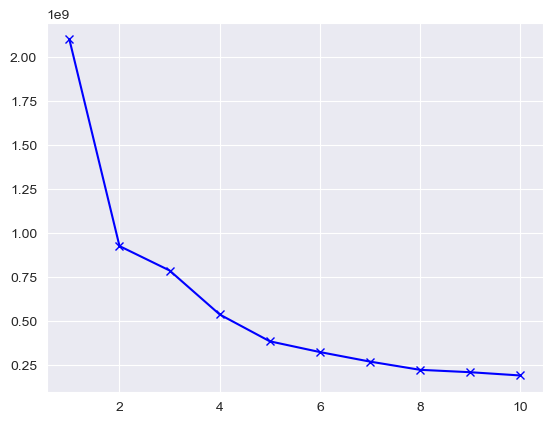

In [57]:
plt.plot(K, distortions, 'bx-')
plt.show()

In [58]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2.0432076102210622e+24
2 : 3.868021708334452e+23
3 : 2.4987004904212602e+23
4 : 1.5632146829940273e+23
5 : 1.0349811797557316e+23
6 : 7.015356404304242e+22
7 : 5.037260796672818e+22
8 : 3.780031942405516e+22
9 : 3.025375753368865e+22
10 : 2.3998402760279308e+22


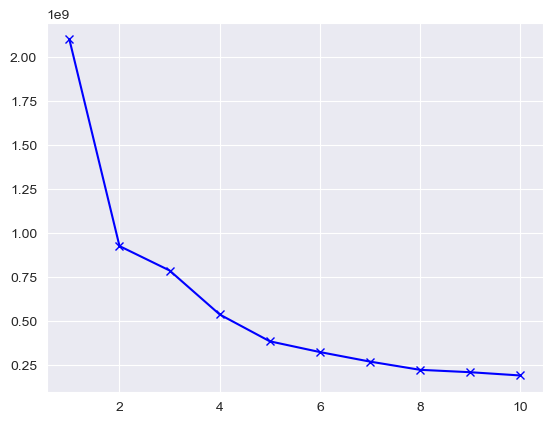

In [59]:
plt.plot(K, distortions, 'bx-')
plt.show()

siluette analysis

For n_clusters = 2 The average silhouette_score is : 0.9363091322044107


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.8769069556865065


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.8799044512044292


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.879720005428892


/Users/miti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


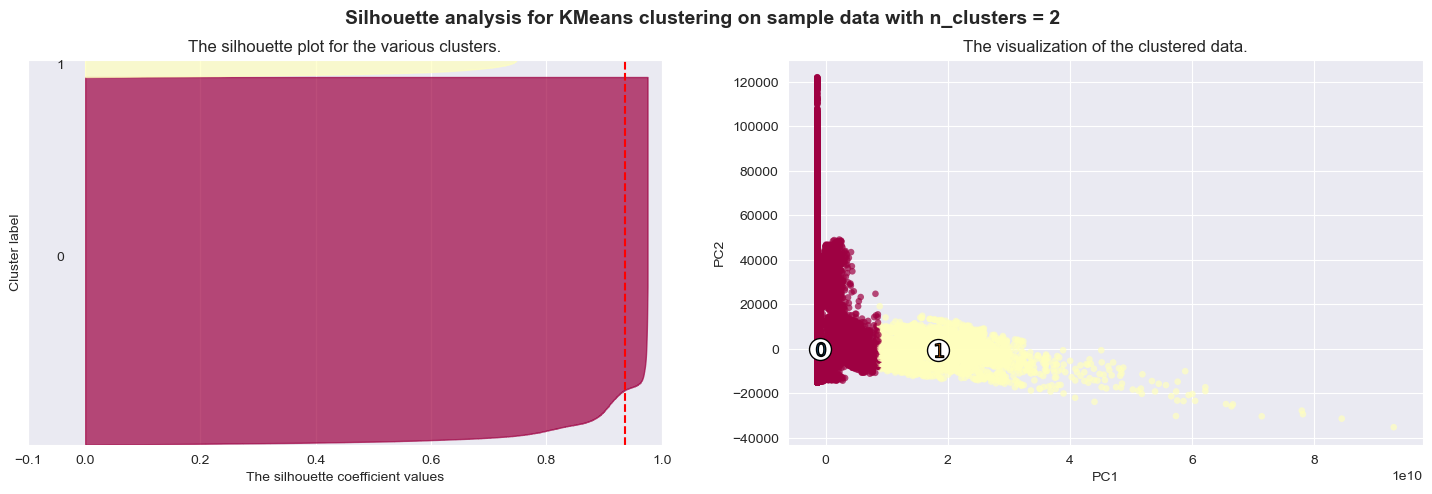

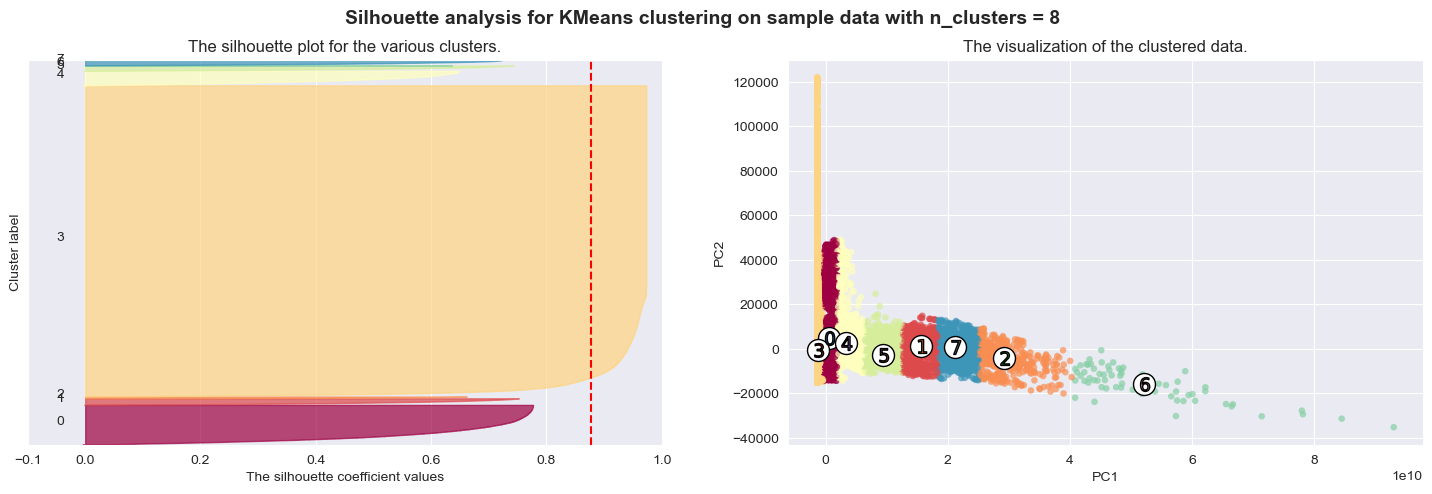

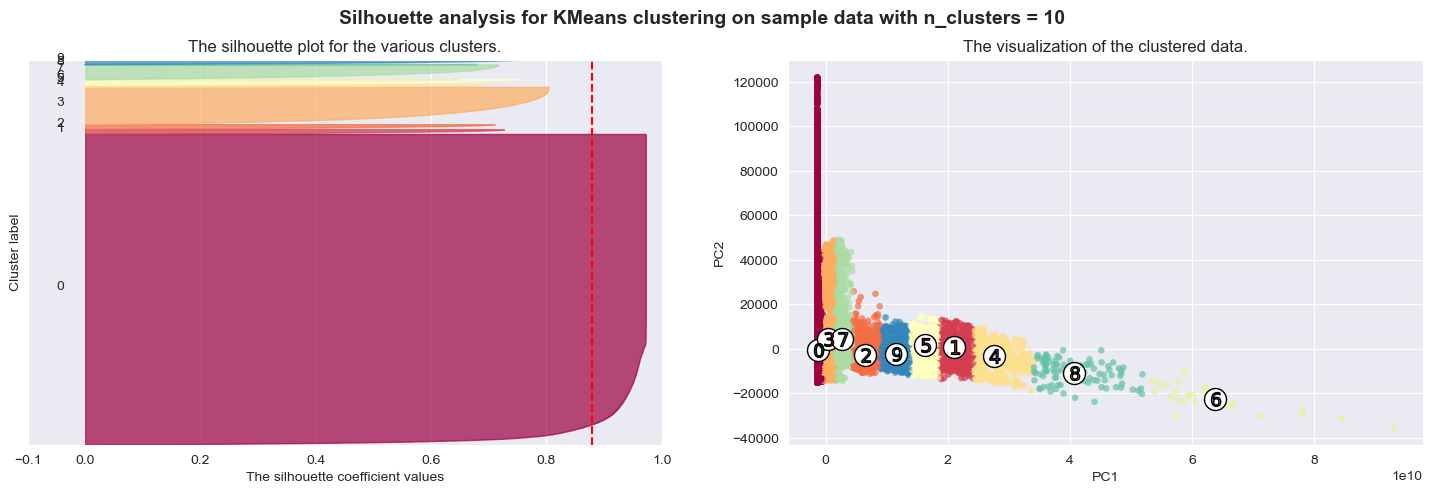

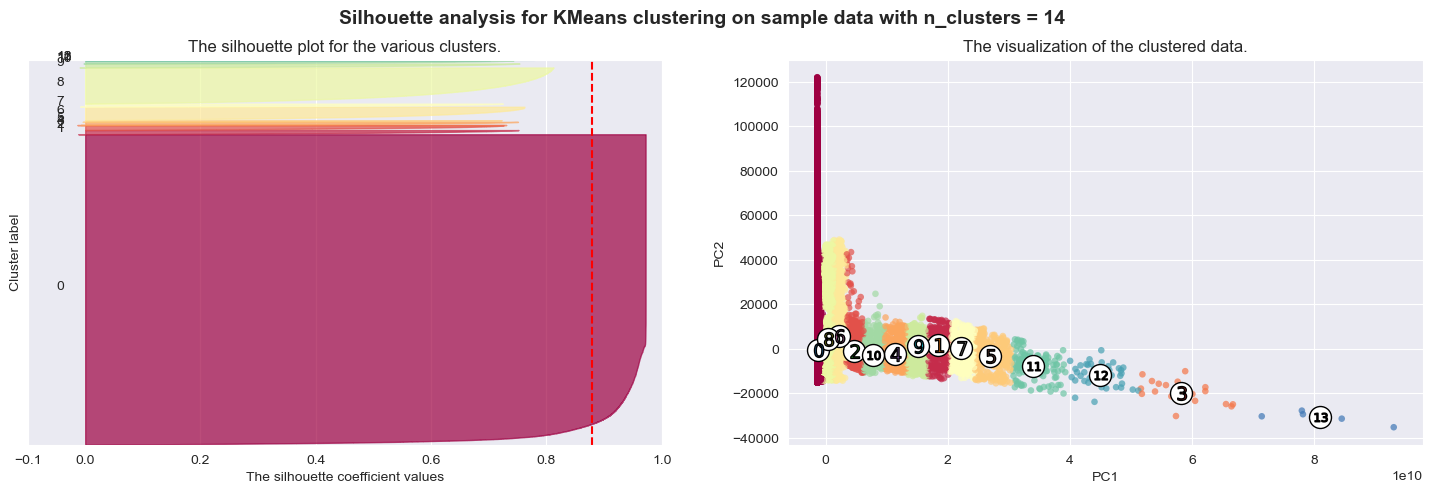

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = [2,8,10,14]

pca_2d = PCA(n_components=6)
pca_2d_r = pca_2d.fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=9000)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d_r[:, 0], pca_2d_r[:, 1], marker='.', s=90, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = pca_2d.transform(centers)
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

/Users/miti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


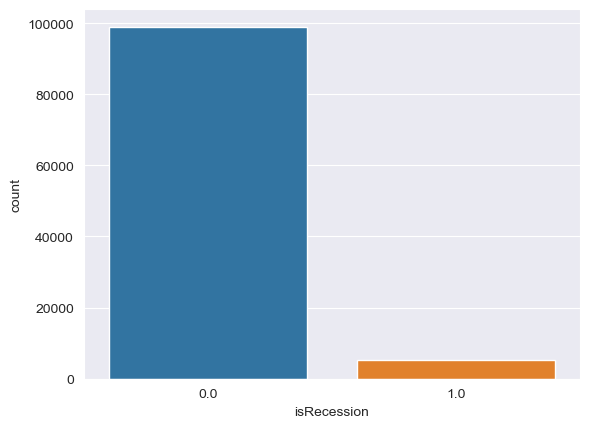

In [73]:
sns.countplot(main_df['isRecession'],label="Count")
one = main_df['isRecession'].value_counts()

In [75]:
main_df_copy2

,CloseUSD,High,Low,Open,Close,isRecession
0,333.879006,2568.300049,2568.300049,2568.300049,2568.300049,0.0
1,330.213013,2540.100098,2540.100098,2540.100098,2540.100098,0.0
2,331.811987,2552.399902,2552.399902,2552.399902,2552.399902,0.0
3,335.906987,2583.899902,2583.899902,2583.899902,2583.899902,0.0
4,338.923013,2607.100098,2607.100098,2607.100098,2607.100098,0.0
...,...,...,...,...,...,...
104219,4625.367578,66812.453130,66022.976560,66054.921880,66076.679690,0.0
104220,4627.575859,66446.367190,66030.351560,66076.679690,66108.226560,0.0
104221,4685.817500,66940.250000,66102.546880,66108.226560,66940.250000,0.0
104222,4728.840157,67726.562500,66794.609380,66940.250000,67554.859380,0.0


<AxesSubplot:>

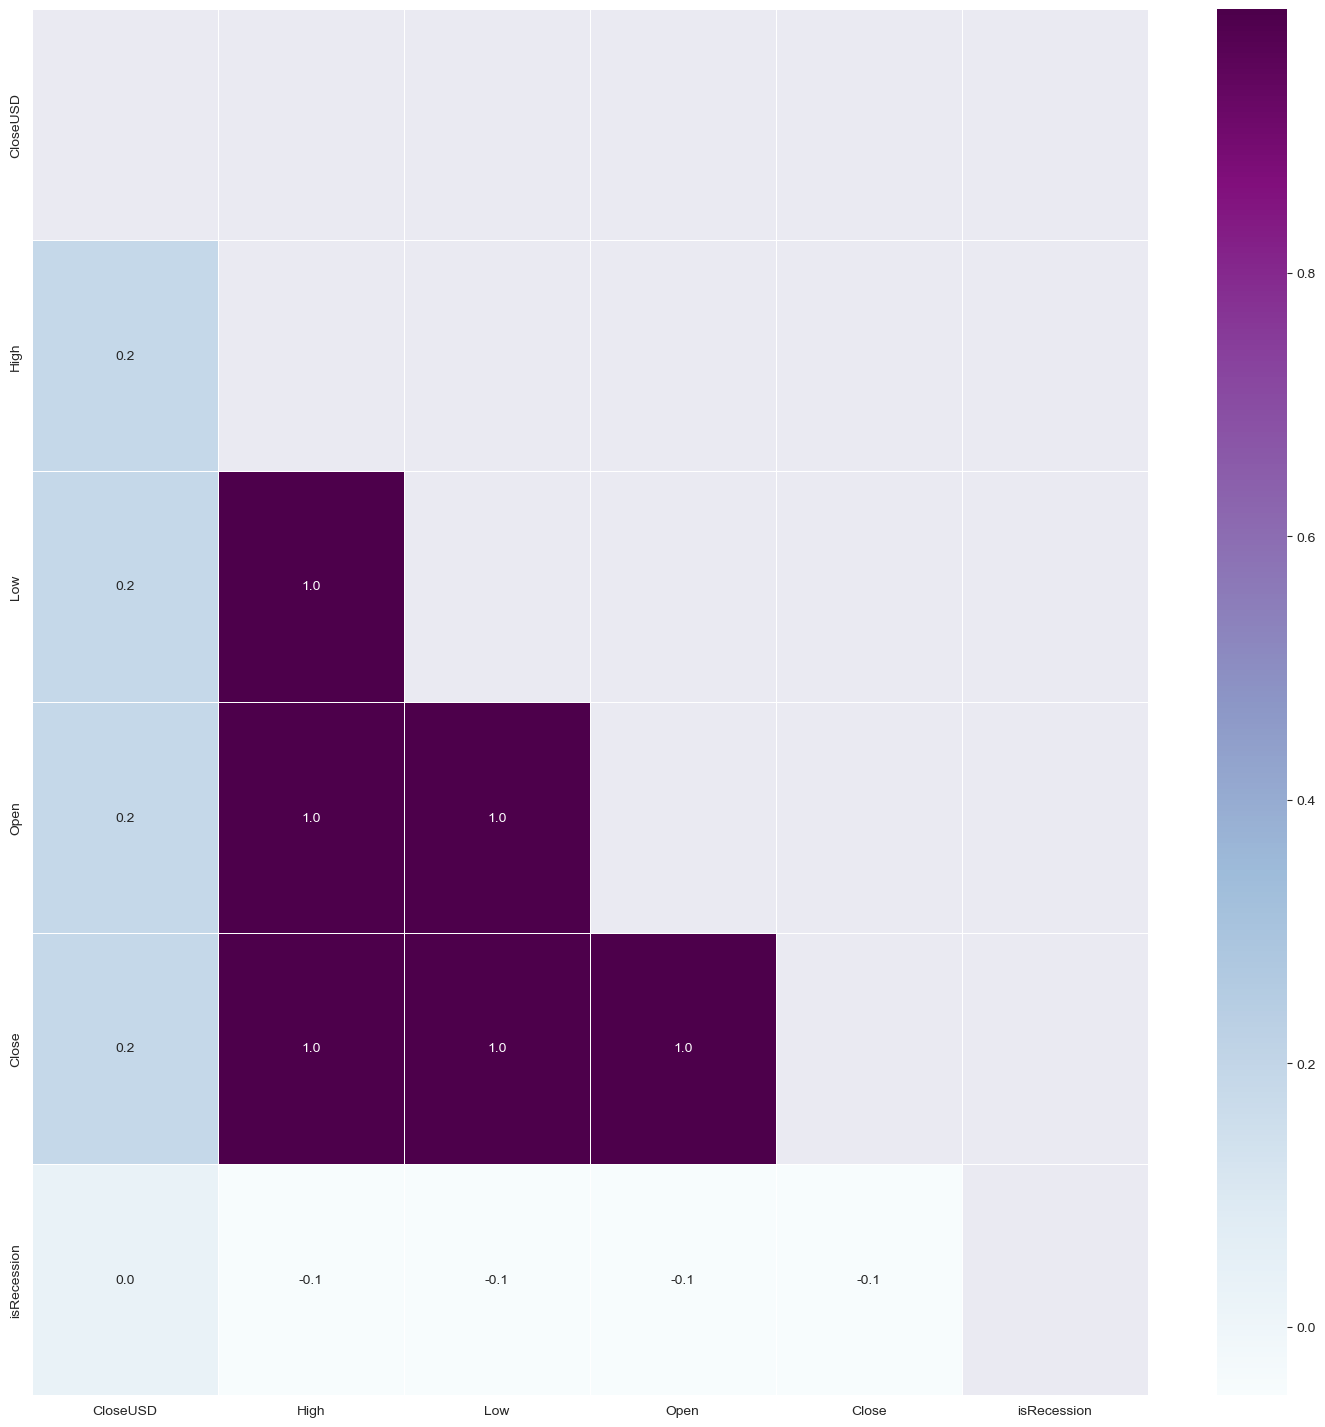

In [76]:
f, ax = plt.subplots(figsize=(18,18))
matrix = np.triu(main_df_copy2.corr())
sns.heatmap(main_df_copy2.corr(), annot=True, linewidth=.5, fmt='.1f',
           ax=ax, mask=matrix,cmap="BuPu")